# EDA

In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/ACER/Downloads/Covid-19.csv")

In [5]:
data = data.drop('Unnamed: 0',axis=1)

In [6]:
data

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Top Cases/1MPop,Deaths/1MPop,Total Tests,Tests/1MPop,Population
0,North America,131889132,NaN,1695941.0,NaN,127665129.0,350.0,2528062.0,6095.0,NaN,NaN,NaN,NaN,NaN
1,Asia,221500265,NaN,1553662.0,NaN,205673091.0,NaN,14273512.0,14733.0,NaN,NaN,NaN,NaN,NaN
2,Europe,253406198,NaN,2101824.0,NaN,248754104.0,474.0,2550270.0,4453.0,NaN,NaN,NaN,NaN,NaN
3,South America,70200879,NaN,1367332.0,NaN,66683585.0,NaN,2149962.0,8953.0,NaN,NaN,NaN,NaN,NaN
4,Oceania,14895771,NaN,33015.0,NaN,14752388.0,NaN,110368.0,31.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80.0,NaN,58055.0,NaN,NaN,NaN,1.378000e+03
234,Vatican City,29,NaN,NaN,NaN,29.0,NaN,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
235,Western Sahara,10,NaN,1.0,NaN,9.0,NaN,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05
236,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Biểu đồ phân phối số ca mắc bệnh

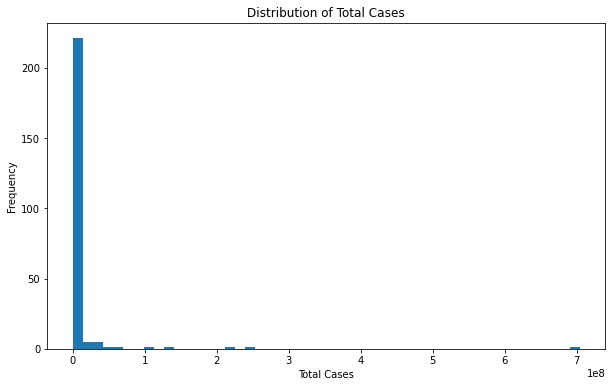

In [9]:
plt.figure(figsize=(10, 6))
data['Total Cases'].hist(bins=50)
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 2. Biểu đồ phân phối số ca tử vong

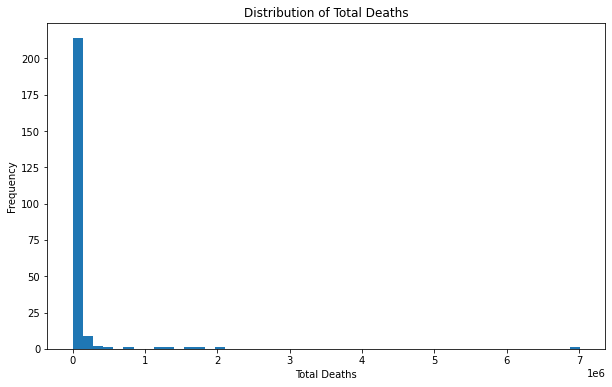

In [10]:
plt.figure(figsize=(10, 6))
data['Total Deaths'].hist(bins=50)
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


# 3. Biểu đồ phân phối số ca hồi phục

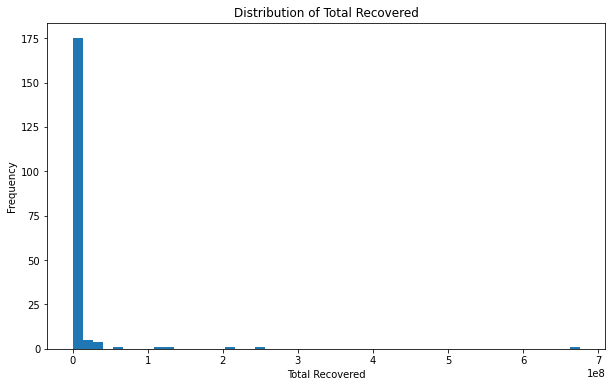

In [11]:
plt.figure(figsize=(10, 6))
data['Total Recovered'].hist(bins=50)
plt.title('Distribution of Total Recovered')
plt.xlabel('Total Recovered')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 4. Biểu đồ phân phối số ca đang hoạt động

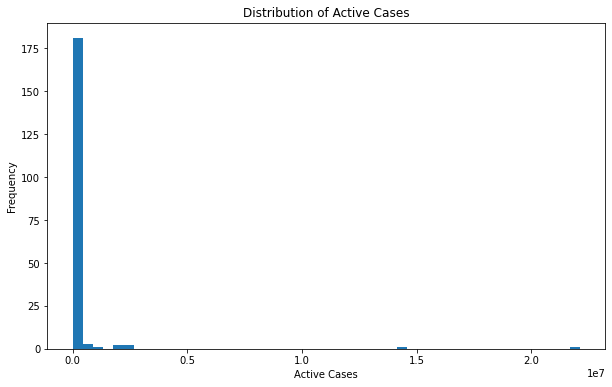

In [12]:
plt.figure(figsize=(10, 6))
data['Active Cases'].hist(bins=50)
plt.title('Distribution of Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 5. Biểu đồ thanh ngang cho top 10 quốc gia có tổng số ca mắc bệnh nhiều nhất

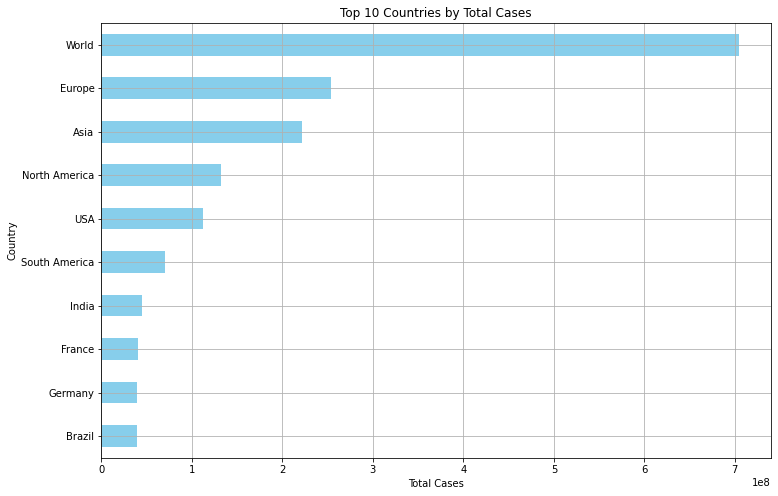

In [21]:
plt.figure(figsize=(12, 8))
top_10_countries = data.groupby('Country')['Total Cases'].sum().nlargest(10).sort_values(ascending=True)
top_10_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.grid(True)
plt.show()


# 6. Biểu đồ tròn cho tỷ lệ tổng số ca mắc bệnh của các châu lục (top 10 có tỷ lệ cao nhất)

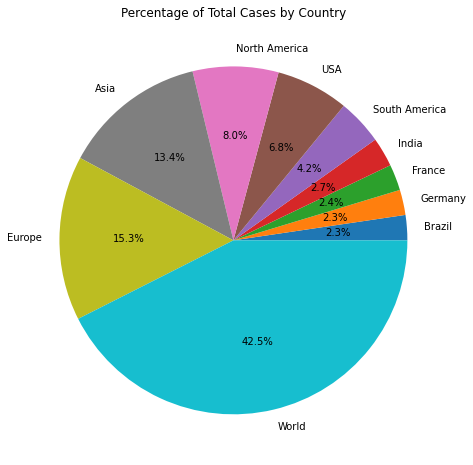

In [22]:
plt.figure(figsize=(12, 8))
data.groupby('Country')['Total Cases'].sum().nlargest(10).sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Total Cases by Country')
plt.ylabel('')
plt.show()

# 7. Biểu đồ phân tán cho số ca tử vong và số ca mắc bệnh

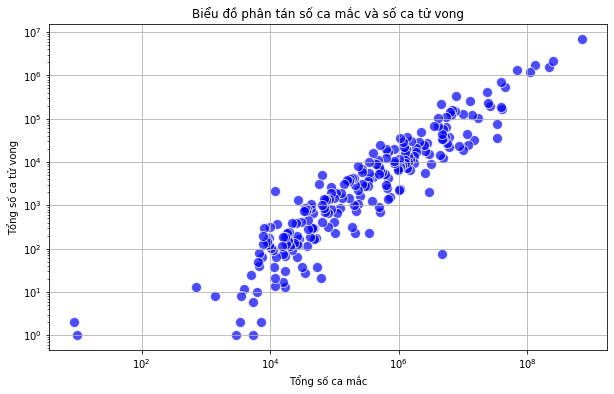

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Cases'], data['Total Deaths'], s=100, c='blue', alpha=0.7, edgecolors='w')
plt.title('Biểu đồ phân tán số ca mắc và số ca tử vong')
plt.xlabel('Tổng số ca mắc')
plt.ylabel('Tổng số ca tử vong')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# 8. Biểu đồ phân tán cho số ca hồi phục và số ca mắc bệnh

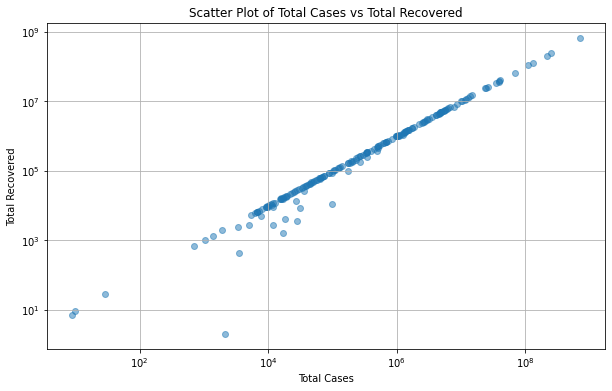

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Cases'], data['Total Recovered'], alpha=0.5)
plt.title('Scatter Plot of Total Cases vs Total Recovered')
plt.xlabel('Total Cases')
plt.ylabel('Total Recovered')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()